# Visualizing Data: Matplotlib \& Descriptive Statistics
## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

## Scatter Plot Example

In [3]:

# Set seed for generating random numbers
np.random.seed(0)

# Define values for x-axis
x = np.random.randn(30)
# Define values for y-axis
y = np.sin(x) + np.random.rand(30)

# Set the graph size
plt.figure(figsize=(20,6))

# Display the graph
plt.plot(x, y, 'o')
# Alternatively, you can use scatter
plt.scatter(x, y)

# Title
plt.title('Scatter plot for x and y')
# Name labels
plt.xlabel('X')
plt.ylabel('Y')
# Show grid
plt.grid(True)

## Line Plot Example: X vs. Y

In [4]:
# Plot continuous line
np.random.seed(0)

# Domain of the data
x_data = np.arange(1000)
# Rank of data. Cumulative sum of samples of normal distribution.
y_data = np.random.randn(1000).cumsum()

# Plot size
plt.figure(figsize=(15,6))

# Set label as legend in the options of plot
plt.plot(x_data, y_data,label='cumsum')
plt.legend()

plt.xlabel('X')
plt.xlabel('Y')
plt.grid(True)

## Subplots

In [5]:
plt.figure(figsize=(20,9))

# Define the first subplot of a plot of 2 rows and 1 column
plt.subplot(2,1,1)

# Let's define the domain of out function from -10 to 10 with 100 subintervals
x = np.linspace(-10, 10, 100)
plt.plot(x, np.sin(x))

# The second subplot
plt.subplot(2,1,2)
plt.plot(x, np.sin(2*x))
plt.grid(True)
plt.savefig("output_graph_3.png")

## Histogram Example

In [6]:
# Fix the seed
np.random.seed(0)

# Define the size of the histogram
plt.figure(figsize=(20, 7))

# Define the data as a sample of a normal distribution with scale 10 and localization 50
data_norm = 10 * np.random.randn(10 ** 5) + 50

# Plot histogram
plt.hist(data_norm, bins = 60, range=(20, 80))

plt.grid(True)
plt.savefig("output_graph_4.png")

## Importing Data from the Web

In [7]:
# Modules to get data from internet and handling zip files
import requests, zipfile
from io import StringIO
import io

In [8]:
# Set url from which data will be downloaded 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# Obtain data from the url
r = requests.get(url, stream=True) # Setting "stream=True" allows to download large files in chunks

# Open zip file
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [11]:
student_data = pd.read_csv('student-mat.csv', sep=';')
student_data.head(10)
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Getting basic information about DataSet

In [12]:
# Getting the first values of the column 'sex'
student_data['sex'].head()

# Getting the first values of the column 'absences'
student_data['absences'].head()

# Compute the mean of 'age' grouped by 'sex'
student_data.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

## Histogram for a variable of the DataSet

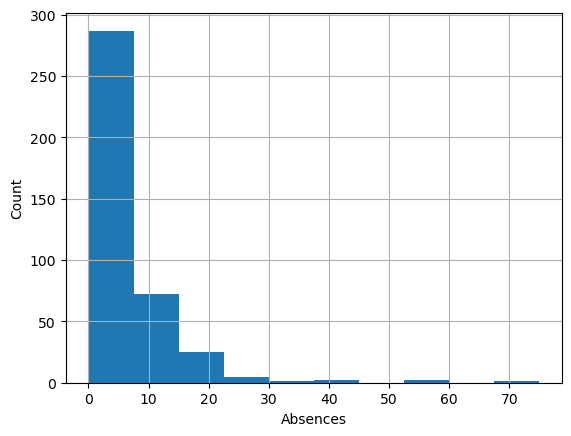

In [ ]:
# Histogram
plt.hist(student_data['absences'])

# Label each axis
plt.xlabel('Absences')
plt.ylabel('Count')

# Turn on grid
plt.grid(True)
plt.savefig("output_graph_5.png")

## Descriptive Statistics

In [ ]:
# Mean
print(f"Mean: {student_data['absences'].mean()}")

# Median
print(f"Median: {student_data['absences'].median()}")

# Mode 
print(f"Mode: {student_data['absences'].mode()}")

Mean: 5.708860759493671
Median: 4.0
Mode: 0    0
Name: absences, dtype: int64


## Variance and Standard Deviation

In [13]:
# Variance
print(f"Variance: {student_data['absences'].var()}")

# Standard Deviation
print(f"Standard Deviation: {student_data['absences'].std()}")

Variance: 64.04954057700951
Standard Deviation: 8.003095687108177


## Percentiles

In [ ]:
# 10%, 25%, 50%, 75% and 90% percentile
print(f"Percentiles at: \n{student_data['absences'].quantile([0.1, 0.25, 0.50, 0.75, 0.9])}")

Percentiles at: 
0.10     0.0
0.25     0.0
0.50     4.0
0.75     8.0
0.90    14.0
Name: absences, dtype: float64


In [ ]:
# Show the quartiles and more info
student_data['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [ ]:
# Calculate the IQR
student_data['absences'].describe().iloc[6]-student_data['absences'].describe().iloc[4]

8.0

## Box plot

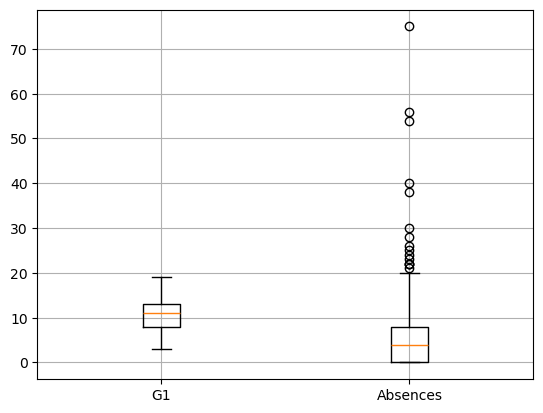

In [ ]:
# Box plot for variables G1 and absences
plt.boxplot([student_data['G1'], student_data['absences']], \
            labels=['G1', 'Absences'])
plt.grid(True)
plt.savefig("output_graph_6.png")